<a href="https://colab.research.google.com/github/Qteit/Prediction-of-Product-Sales/blob/main/project_1_core_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [3]:
path = '/content/drive/MyDrive/AXSOSACADEMY/AXSOSACADEMY/01-Fundamentals/Week02/sales_predictions_2023.csv'
df=pd.read_csv(path)
df.shape

(8523, 12)

# Exploratory Visuals & Analysis

##Histograms to view the distributions of numerical features in your dataset.

In [4]:
num_cols=df.select_dtypes(include=['number']).columns
num_cols

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

##Histograms

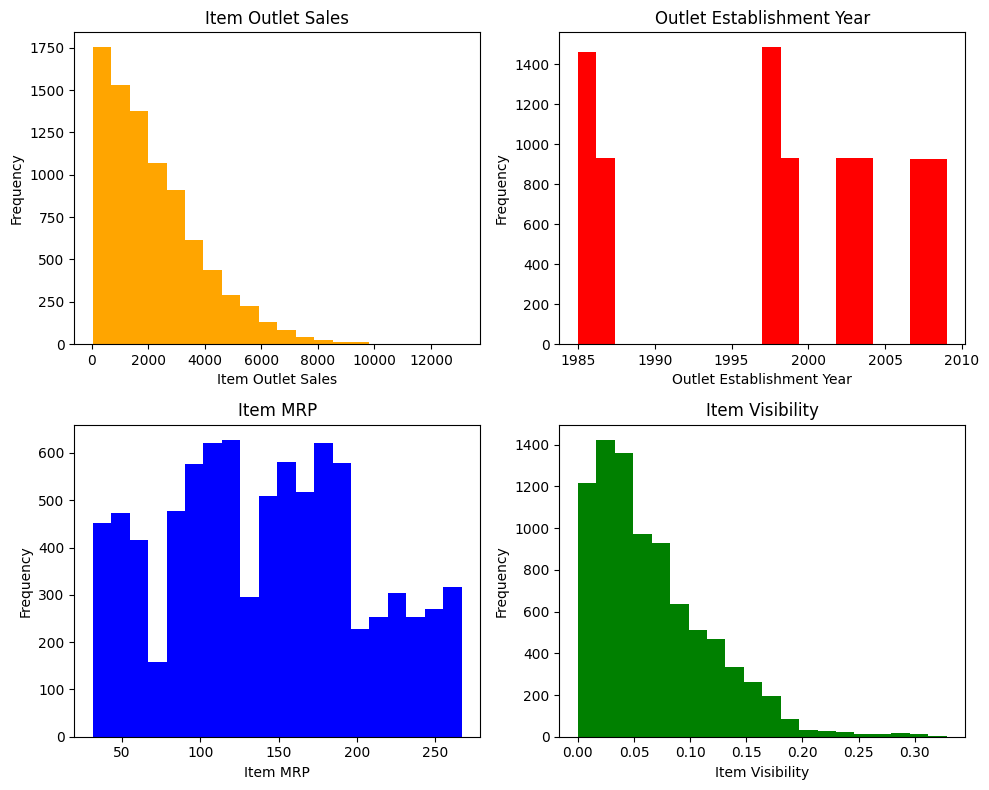

In [5]:
# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

#for Item Visibility
axes[1, 1].hist(df['Item_Visibility'], bins=20 , color = 'Green')
axes[1, 1].set_xlabel("Item Visibility")
axes[1, 1].set_ylabel("Frequency")
axes[1, 1].set_title("Item Visibility")

# For Item MRP
axes[1, 0].hist(df['Item_MRP'], bins=20, color= 'Blue')
axes[1, 0].set_xlabel("Item MRP")
axes[1, 0].set_ylabel("Frequency")
axes[1, 0].set_title("Item MRP")

# For Outlet Establishment Year
axes[0, 1].hist(df['Outlet_Establishment_Year'], bins=20, color='red')
axes[0, 1].set_xlabel("Outlet Establishment Year")
axes[0, 1].set_ylabel("Frequency")
axes[0, 1].set_title("Outlet Establishment Year")

# For Item Outlet Sales
axes[0, 0].hist(df['Item_Outlet_Sales'], bins=20, color='orange')
axes[0, 0].set_xlabel("Item Outlet Sales")
axes[0, 0].set_ylabel("Frequency")
axes[0, 0].set_title("Item Outlet Sales")

plt.tight_layout()
plt.show()

##Boxplot

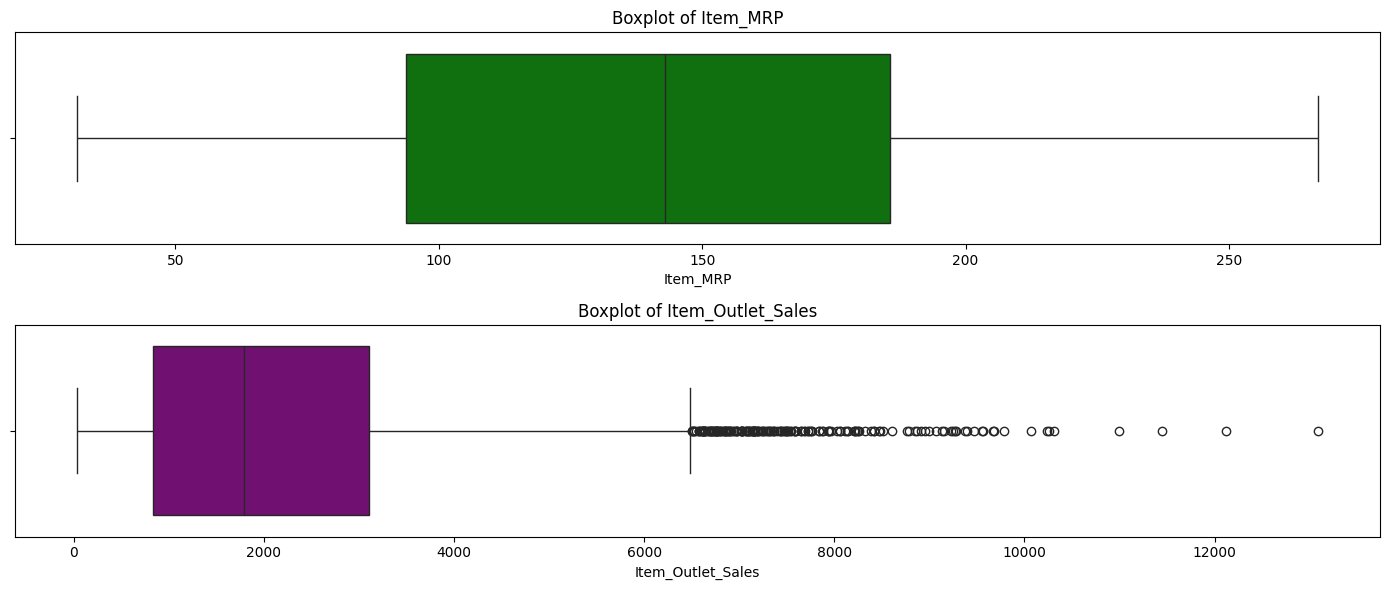

In [6]:
fig, axes = plt.subplots(2, 1, figsize=(14, 6))

# For Item_MRP
sns.boxplot(x=df['Item_MRP'], ax=axes[0], color='green')
axes[0].set_title('Boxplot of Item_MRP')
axes[0].set_xlabel('Item_MRP')

# For Item_Outlet_Sales
sns.boxplot(x=df['Item_Outlet_Sales'], ax=axes[1], color='purple')
axes[1].set_title('Boxplot of Item_Outlet_Sales')
axes[1].set_xlabel('Item_Outlet_Sales')

plt.tight_layout()
plt.show()

##categorial features

In [7]:
str_cols = df.select_dtypes("object").columns
str_cols

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [8]:
df[str_cols].nunique()

,0
Item_Identifier,1559
Item_Fat_Content,5
Item_Type,16
Outlet_Identifier,10
Outlet_Size,3
Outlet_Location_Type,3
Outlet_Type,4


In [12]:
df['Item_Fat_Content'].value_counts()

,count
Item_Fat_Content,
Low Fat,5517
Regular,3006


In [10]:
# replacing data
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'LF':"Low Fat",'reg':'Regular' , "low fat": "Low Fat"})
df['Item_Fat_Content'].value_counts()

,count
Item_Fat_Content,
Low Fat,5517
Regular,3006


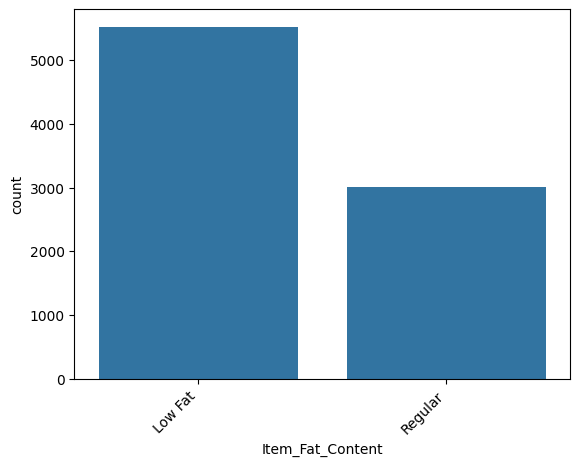

In [11]:
ax = sns.countplot(data=df, x="Item_Fat_Content", order=df['Item_Fat_Content'].value_counts().index)

plt.xticks(rotation=45, ha="right");

##Correlation and Heatmap

In [13]:
corr = df.corr(numeric_only=True)
corr

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.014048,0.027141,-0.011588,0.014123
Item_Visibility,-0.014048,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.027141,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.011588,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.014123,-0.128625,0.567574,-0.049135,1.000000


(array([0.5, 1.5, 2.5, 3.5, 4.5]),
 [Text(0.5, 0, 'Item_Weight'),
  Text(1.5, 0, 'Item_Visibility'),
  Text(2.5, 0, 'Item_MRP'),
  Text(3.5, 0, 'Outlet_Establishment_Year'),
  Text(4.5, 0, 'Item_Outlet_Sales')])

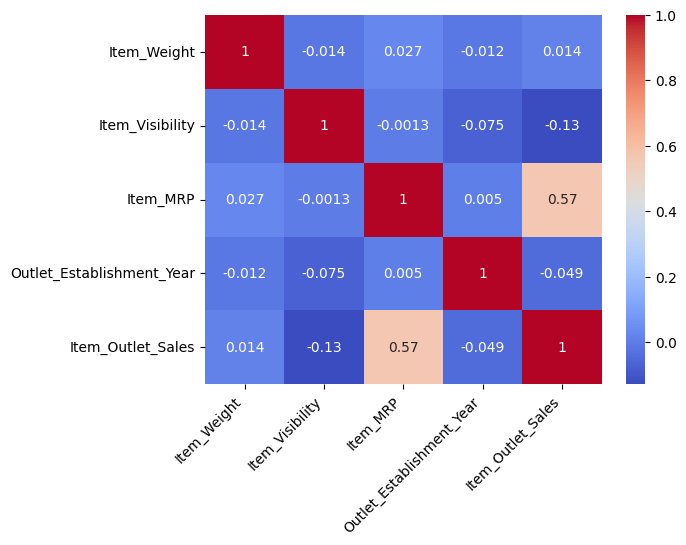

In [15]:
sns.heatmap(corr, cmap="coolwarm", annot = True);
plt.xticks(rotation=45, ha="right")